In [ ]:
"""
11/23
Purpose: To analyze the fashion dataset using tree based methods

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!git clone https://github.com/celiibrendan/fashion-mnist.git

In [3]:
from os import sys
sys.path.append("/fashion-mnist/utils/")
sys.path.append("../../../machine_learning_tools/")

In [4]:
import sklearn_models as sklm
import sklearn_utils as sklu
import numpy_ml as nu
import general_utils as gu

# loads the fashion dataset

In [5]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='t10k')

In [6]:
X_train.shape

(60000, 784)

In [7]:
import numpy as np
np.sqrt(784)

28.0

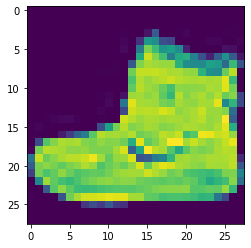

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28))

# Part B: Bag Error/Validation vs the Number of Trees

In [11]:
import numpy as np

In [26]:
 """
Purpose:  
Out of Bag Error. For Bagging and Random Forests, plot the out of bag error verses the number
of trees in the ensemble. How does the out of bag error compare to that of the test error?

Pseudocode: 
0) Set the  parameters to some default value and a range of number of trees
Iterate through number of trees: 
    1) Train
    2) Get the out of bag score
    3) Get the validation score
    4) Store (as dict in dataframe)

Plot all of the curves and compare
        
"""
verbose = True
max_depth = 5
max_features= np.ceil(np.sqrt(X_test.shape[1])).astype('int')
if verbose:
    print(f"max_features= {max_features}")
bootstrap = True
oob_score = True
random_state = 10

bag_parameters = dict(
    base_estimator = sklm.DecisionTreeClassifier(
    max_depth=max_depth,
    ),
    max_features = max_features,
    bootstrap=bootstrap,
    oob_score=oob_score,
    random_state = random_state
)

forest_parameters = dict(
    max_depth=max_depth,
    max_features = max_features,
    bootstrap=bootstrap,
    oob_score=oob_score,
    random_state = random_state
)

n_estimators = np.arange(30,500,20)
print(f"n_estimators ({len(n_estimators)}) = {n_estimators}")

max_features= 28
n_estimators (24) = [ 30  50  70  90 110 130 150 170 190 210 230 250 270 290 310 330 350 370
 390 410 430 450 470 490]


In [27]:
from tqdm.notebook import tqdm
results_df_dict = []
for n_est in tqdm(n_estimators):
    
    #train the models
    clf_bag = sklm.BaggingClassifier(n_estimators = n_est,
                                    **bag_parameters).fit(X_train,y_train)
    clf_forest = sklm.RandomForestClassifier(n_estimators = n_est,
                                    **forest_parameters).fit(X_test,y_test)
    #get the out of bag error
    oob_bag = clf_bag.oob_score_
    oob_forest = clf_forest.oob_score_
    
    #calculate the validation score
    val_bag = sklu.accuracy(clf_bag,X_test,y_test)
    val_forest = sklu.accuracy(clf_forest,X_test,y_test)
    
    #store the results
    results_df_dict+=[dict(
        classifier="Bag",
        n_estimators=n_est,
        score=oob_bag,
        score_type = "oob"),
         dict(
        classifier="Bag",
        n_estimators=n_est,
        score=val_bag,
        score_type = "val"),
    ]
        
    results_df_dict+=[dict(
        classifier="RF",
        n_estimators=n_est,
        score=oob_forest,
        score_type = "oob"),
         dict(
        classifier="RF",
        n_estimators=n_est,
        score=val_forest,
        score_type = "val"),
    ]
    
    

  0%|          | 0/24 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of 

In [28]:
import pandas as pd
results_df = pd.DataFrame.from_records(results_df_dict)
results_df["clf_type_score_type"] = results_df["classifier"] + "_" + results_df["score_type"]
results_df

,classifier,n_estimators,score,score_type,clf_type_score_type
0,Bag,30,0.756500,oob,Bag_oob
1,Bag,30,0.756200,val,Bag_val
2,RF,30,0.752000,oob,RF_oob
3,RF,30,0.765400,val,RF_val
4,Bag,50,0.768867,oob,Bag_oob
...,...,...,...,...,...
91,RF,470,0.767500,val,RF_val
92,Bag,490,0.784017,oob,Bag_oob
93,Bag,490,0.774100,val,Bag_val
94,RF,490,0.759800,oob,RF_oob


# Plotting the Results

<AxesSubplot:xlabel='n_estimators', ylabel='score'>

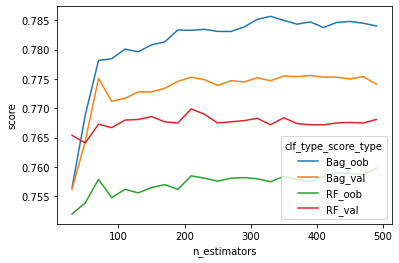

In [29]:
import seaborn as sns
sns.lineplot(data=results_df, x="n_estimators", y="score", hue="clf_type_score_type")